# Fuel Cost Optimization Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
cp.__version__

'1.1.7'

## Initialization of system dynamics and hyper parameter
Let $x(t)$ be state and $u(t)$ be input.  
- Fuel cost funtion follows like this:  
$$
f(a) = \begin{cases}
|a| & , |a| \leq 1 \\
2|a|-1 & |a| > 1 
\end{cases}
$$
  
- Totol fuel cost follows like this:  
$$
F = \sum_{t=1}^{N-1} f(u(t))
$$

- System dynamics follows like this:

$$
x(t+1) = A x(t) + B u(t) \; for \; t = 0,\cdot,N-1 
$$

- Optimization problem can be defined as follows:

$$
\begin{align}
\underset{u{t}}{min} \sum_{t=0}^{N-1} f(u(t)) \; &s.t. \\
x(t+1) &= A x(t) + B u(t) \; for \; t = 0,\cdot,N-1 \\
x(0) &= 0 \\
x(N) &= x_{des}
\end{align}
$$

In [2]:
n = 3 # state dim
N = 30 # time horizon
A = np.array([[-1, 0.4, 0.8],[1, 0, 0],[0, 1, 0]])
B = np.array([1, 0, 0.3]).reshape(n,1)
x0 = np.zeros(shape=(n,1))
xdes = np.array([7, 2, -6]).reshape(n,1)

## Problem Definition and Finding solution with cvxpy

In [3]:
def cost(a):    
    x = cp.abs(a)
    y = 2 * cp.abs(a) - 1
    out = cp.max(cp.vstack([x,y]))
    return out

x = cp.Variable(shape=(n,N+1))
u = cp.Variable(shape=(1,N))

total_cost = 0
constr = []
for t in range(N):
    total_cost += cost(u[:,t])
    constr += [x[:,t+1] == A@x[:,t] + B@u[:,t]]

constr += [x[:,0] == x0[:,0], x[:,N] == xdes[:,0]]
# constr = x[:,1:N+1] == A@x[:,0:N] + B@u

prob = cp.Problem(cp.Minimize(total_cost), constraints=constr)
prob.solve()

# Print result.
print("\nThe optimal cost is", prob.value)
print("The optimal input is")
print(u.value)


The optimal cost is 17.323567851898538
The optimal input is
[[ 3.29220286e-11  4.43409588e-11 -4.10965143e-09  1.00000000e+00
  -1.00000000e+00  1.00000000e+00 -1.22937435e-10  3.52557537e-12
   9.97638379e-11 -9.99999999e-01  1.00000000e+00 -1.00000000e+00
   2.46624155e-01 -4.48381061e-11 -1.94767993e-11  2.97961922e-10
  -1.00000000e+00  1.00000000e+00 -9.99999999e-01  2.60644166e-10
  -4.11865495e-12 -3.22199860e-11  1.00000000e+00 -6.98881472e-01
   1.00000000e+00 -9.33641505e-11  2.85325077e-09  1.19009817e-10
   1.13195663e-11  3.18903111e+00]]


# Plot desired input

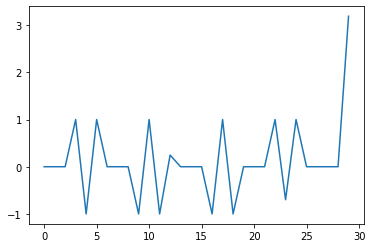

In [4]:
input_values = u.value.flatten()
plt.plot(range(N), input_values)

# Plot state transition along desired input

[ 2.         -6.95670933 10.74206578]


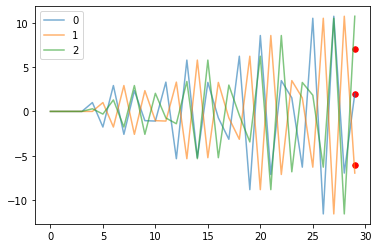

In [31]:
inputs = u.value
outputs = np.zeros(shape=(n,N))
for t in range(N-1):
    outputs[:,t+1] = np.matmul(A,outputs[:,t]) + np.matmul(B,inputs[:,t])
for i in range(n):
    plt.plot(range(N), outputs[i,:], label=str(i),alpha=0.6)
    plt.scatter(29, xdes[i],color='r',s=30)
print(outputs[:,29])
plt.legend()